<a href="https://colab.research.google.com/github/ElisabethDB/Eindopdracht-Deep-Learning/blob/main/1_EDA_De_Bock_Elisabeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

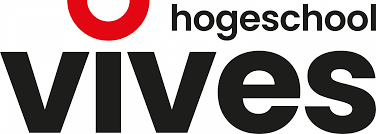<br>

**Deep Learning**<br>
Academiejaar 2022-2023<br>
De Bock Elisabeth

---

---


# Voorbereiding

In [ ]:
#import libraries
import os, shutil, pathlib
import random
import math
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the root directory where the images are stored
rootdir= './drive/MyDrive' 

# Define the categories of images
categories = ['Rubens','Picasso','Mondriaan','Rembrandt']

In [ ]:
def get_image_statistics(categories):
    for category in categories:
        image_dir = rootdir + '/' + category
        print(f"Statistics for {category}:")

        # Load all the images in a directory
        images = [Image.open(os.path.join(image_dir, f)) for f in os.listdir(image_dir)]

        # Get the width and height of each image
        sizes = [(img.size[0], img.size[1]) for img in images]

        # Calculate the minimum, maximum, mean, median, and other statistics of the sizes
        min_size = min(sizes)
        max_size = max(sizes)
        mean_size = np.mean(sizes, axis=0)
        median_size = np.median(sizes, axis=0)
        p25_size = np.percentile(sizes, 25, axis=0)
        p75_size = np.percentile(sizes, 75, axis=0)

        # Print the statistics
        print(f"Minimum size: {min_size}")
        print(f"Maximum size: {max_size}")
        print(f"Mean size: {mean_size}")
        print(f"Median size: {median_size}")
        print(f"25th percentile size: {p25_size}")
        print(f"75th percentile size: {p75_size}")
        print()

# Call the function with a list of categories
get_image_statistics(categories)

Statistics for Rubens:
Minimum size: (181, 381)
Maximum size: (7264, 3883)
Mean size: [687.98379971 686.18703976]
Median size: [605. 667.]
25th percentile size: [347.5 383. ]
75th percentile size: [985.  857.5]

Statistics for Picasso:
Minimum size: (136, 136)
Maximum size: (4608, 3456)
Mean size: [562.92585302 638.77362205]
Median size: [400. 400.]
25th percentile size: [303. 400.]
75th percentile size: [785.   878.25]

Statistics for Mondriaan:
Minimum size: (186, 271)
Maximum size: (5918, 6000)
Mean size: [690.63636364 666.80606061]
Median size: [719.5 678.5]
25th percentile size: [400.  398.5]
75th percentile size: [807.75 800.  ]

Statistics for Rembrandt:
Minimum size: (231, 322)
Maximum size: (738, 600)
Mean size: [541.39423077 624.90384615]
Median size: [591. 600.]
25th percentile size: [471.75 534.75]
75th percentile size: [600.   745.25]



Hernoem alle schilderijen naar een nummer, maak er .jpg van en resize ze naar 180 x 180

In [ ]:
for category in categories:
    directory = os.path.join(rootdir, 'schilderijen', category)
    os.makedirs(directory, exist_ok=True)

In [ ]:
import os
from PIL import Image

def resize_and_rename_images(path,new_path,size):
  i = 0
  for filename in os.listdir(path):
    try:
      # Open the image and resize it
      img = Image.open(os.path.join(path, filename)).resize((size, size))

      # Save the resized image with a new filename
      new_filename = str(i) + ".jpg"
      img.save(os.path.join(new_path, new_filename))

      # Increment the counter
      i += 1
    except:
      # Print an error message if an exception occurs
      print(f"Failed to resize and rename {path+filename}")

# Set the path to the directory containing the original images
mondriaan_path="./drive/MyDrive/Mondriaan/"
picasso_path="./drive/MyDrive/Picasso/" 
rubens_path="./drive/MyDrive/Rubens/"
rembrandt_path="./drive/MyDrive/Rembrandt/"

# Set the path to the directory containing the new images
mondriaan_new_path="./drive/MyDrive/schilderijen/Mondriaan/"
picasso_new_path="./drive/MyDrive/schilderijen/Picasso/"
rubens_new_path="./drive/MyDrive/schilderijen/Rubens/"
rembrandt_new_path="./drive/MyDrive/schilderijen/Rembrandt/"

# Set the size to which the images should be resized
size = 180

# Resize and rename the images
resize_and_rename_images(mondriaan_path, mondriaan_new_path, size)
resize_and_rename_images(rubens_path,rubens_new_path, size)
resize_and_rename_images(picasso_path, picasso_new_path, size)
resize_and_rename_images(rembrandt_path,rembrandt_new_path, size)

Failed to resize and rename ./drive/MyDrive/Mondriaan/tableay-no-iv-lozenge-composition.png
Failed to resize and rename ./drive/MyDrive/Picasso/picasso_meisje_met_duif.png
Failed to resize and rename ./drive/MyDrive/Picasso/woman-with-hat-1962-1.jpg
Failed to resize and rename ./drive/MyDrive/Picasso/bust-of-woman-with-yellow-ribbon-jacqueline-1962.jpg


In [ ]:
# Set the root directory where the images are stored
rootdir= './drive/MyDrive/schilderijen' 

We kijken hoeveel schilderijen er in elke dataset zitten.

In [ ]:
for category in categories:
   print(category, ':', len(os.listdir(os.path.join(rootdir, category))))

Rubens : 679
Picasso : 1521
Mondriaan : 163
Rembrandt : 208


We plotten enkele schilderijen om te controleren of alles correct is verlopen

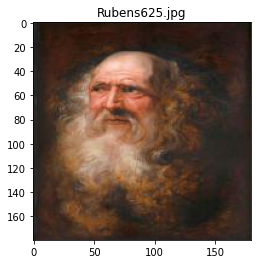

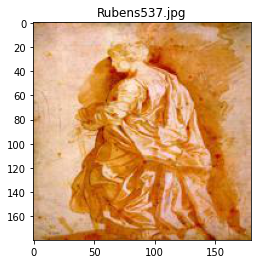

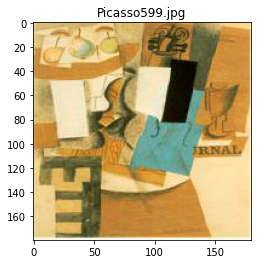

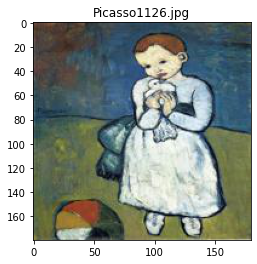

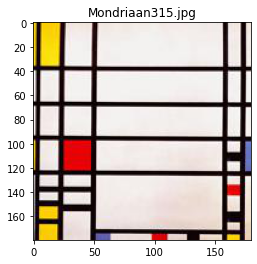

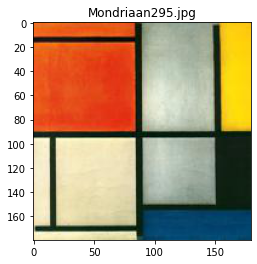

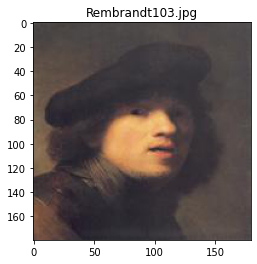

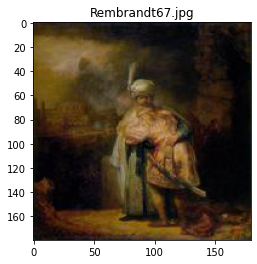

In [ ]:
# Plot 2 random images from each category
for category in categories:
    # Get a list of all the images in this category
    all_images = os.listdir(rootdir + '/' + category)

    # Choose 2 random images
    random_images = random.sample(all_images, 2)

    # Plot the random images
    for image in random_images:
        # Read the image file
        img = plt.imread(os.path.join(rootdir, category, image))

        # Create a new figure
        plt.figure()
        plt.title(category+image)
        plt.axis()

        # Display the image
        plt.imshow(img)

# Show the plots
plt.show()

Om meerdere mogelijkheden te testen, zorgen we dat we de folders kunnen verwijderen.

In [ ]:
# Remove train, test, and val folder for each category
def remove_datasets(rootdir):
    shutil.rmtree(rootdir + '/train')
    shutil.rmtree(rootdir + '/test')
    shutil.rmtree(rootdir + '/validation')

remove_datasets(rootdir)

We maken een functie om de data te splitsen

In [ ]:
def make_subset(subset_name, start_index, end_index): 
    for category in categories:
        # Create a new directory for the subset and category
        directory = os.path.join(rootdir, subset_name, category) 
        os.makedirs(directory)

        # Get a list of all the files in the current category
        all_files = os.listdir(os.path.join(rootdir, category))

        # Iterate over the specified range of indices
        for i in range(start_index, end_index): 
          # Get the file name of the image
          image_name = all_files[i]
          # Copy the image from the rootdir to the new directory
          shutil.copy(src=os.path.join(rootdir, category, image_name), dst=os.path.join(directory, image_name))          

In [ ]:
# Set the categories (i.e. classes) of images
categories = ['Rubens', 'Picasso', 'Mondriaan']

In [ ]:
# Split the dataset 
make_subset("train", start_index=0, end_index=129) 
make_subset("validation", start_index=129, end_index=229) 
make_subset("test", start_index=229, end_index=329)


In [ ]:
subsets = ('train','test','validation')

for category in categories:
   for subset in subsets:
        print(subset, category, ':', len(os.listdir(os.path.join(rootdir, subset, category))))

train Rubens : 129
test Rubens : 100
validation Rubens : 100
train Picasso : 129
test Picasso : 100
validation Picasso : 100
train Mondriaan : 129
test Mondriaan : 100
validation Mondriaan : 100
